# Random Forest Regression

### Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the dataset

In [39]:
dataset = pd.read_csv('Position_Salaries.csv')

In [40]:
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [41]:
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

In [22]:
#X = dataset['Level']
#y = dataset['Salary']
#X = X.values.reshape(-1,1)
#y = y.values.reshape(-1,1)

#### Splitting the dataset into the Training set and Test set

In [27]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Feature Scaling

In [28]:
#from sklearn.preprocessing import StandardScaler
#sc_X = StandardScaler()
#X_train = sc_X.fit_transform(X_train)
#X_test = sc_X.transform(X_test)
#sc_y = StandardScaler()
#y_train = sc_y.fit_transform(y_train.reshape(-1,1))

### Fitting Random Forest Regression to the dataset

In [42]:
from sklearn.ensemble import RandomForestRegressor

In [43]:
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
#regressor.fit(X_train, y_train)
regressor.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [44]:
#y_pred = regressor.predict(X_test)
y_pred = regressor.predict([[6.5]])

### Evaluate Model

#### RSquared Score

In [47]:
print('R Square score is: ',regressor.score(X, y))

R Square score is:  0.9704434230386582


### Formula for Adjusted R^2
$R^2_{adj.} = 1 - (1-R^2)*\frac{n-1}{n-p-1}$

In [48]:
#Step 1: Calculate and store Rsquare in r2
r2 = regressor.score(X,y)
#Step 2: Find n and p
n = X.shape[0]
p = X.shape[1]
#Step 3: Calculate adj r-square
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)

In [49]:
print("Adjusted R-Square is: ", adjusted_r2)

Adjusted R-Square is:  0.9667488509184904


In [36]:
from sklearn import metrics

In [38]:
print("Mean Absolute Error is:",metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error is: ", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error is: ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error is: 279999.3707625768
Mean Squared Error is:  126799113504.27773
Root Mean Squared Error is:  356088.63152911485


#### Visualising the Random Forest Regression results (higher resolution)

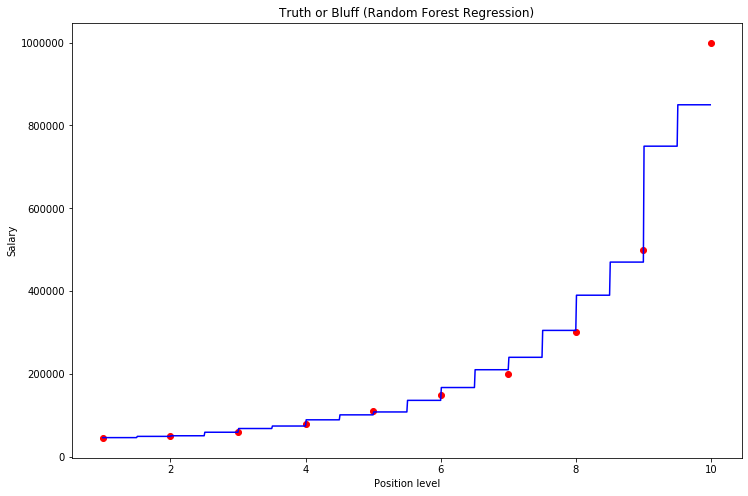

In [51]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.figure(figsize=(12,8))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Random Forest Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()